<a href="https://colab.research.google.com/github/kurniawan26/Belajar-Tensorflow/blob/main/Regresi_Jaringan_Syaraf_(Neural_Network)_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan untuk Regresi Jaringan Syaraf dengan TensorFlow

Sebenarnya banyak definisi mengenai permasalahan regresi namun dalam kasus ini, kita akan menyederhanakannya : memprediksi sebuah angka berdasarkan beberapa pola variabel, lebih mudahnya yaitu memprediksi sebuah angka

In [1]:
# Impor Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Membuat sebuah data untuk ditampilkan

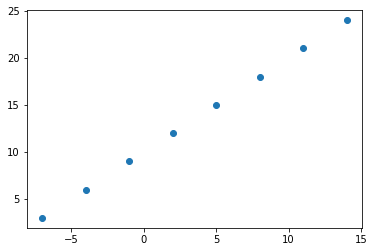

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat sebuah fitur
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Buat label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Mencoba untuk memvisualisasikannya
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Pola dari sebuah masukan dan keluaran

In [9]:
# Membuat sebuah contoh tensor dari kasus prediksi harga jual rumah
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [10]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [20]:
# memasangkan sebuah Numpy kedalam tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

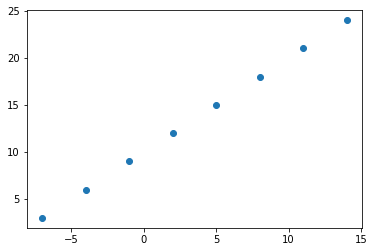

In [14]:
plt.scatter(X, y)

## Langkah - langkah dalam merancang model dengan TensorFlow

1. **Membuat sebuah model** - mendefinisikan sebuah masukan dan keluaran, dengan baik sebagaimana hidden layer dari sebuah model deep learning
2. **Menyusun sebuah model** - mendefinisikan fungsi yang hilang, (atau dengan kata lain yaitu fungsi yang menyatakan seberapa salahkah dia), dan sebuah pengoptimalan (yang menyampaikan bagaimana untuk memperbaiki model pembelajarannya), dan evaluasi metric atau apa yang dapat kita gunakan untuk menginterpetasi dari performa model kita
3. **Menyesuaikan sebuah model** - membiarkan untuk model agar mencoba menemukan pola diantara X & y

In [21]:
# Menentukan sebuah data acak
tf.random.set_seed(42)

# 1. Membuat sebuah model dengan Sekuensial API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Menyusun (Compile) sebuah model
model.compile(loss=tf.keras.losses.mae, # mae adalah kependekan dari arti mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd adalah kependekan dari stochastic gradient descent
              metrics=['mae'])

# 3. Mencocokan sebuah model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 566ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [23]:
# Check out X dan y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Mencoba dan membuat sebuah prediksi menggunakan model kita
model.predict([17.0])

array([[12.716021]], dtype=float32)